In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [2]:


import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)




2023-06-17 04:07:28.740955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-17 04:07:28.740997: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Python version: 3.7.12
Tensorflow version: 2.8.0
Keras version: 2.8.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_test = x_test.reshape(10000, 784)
x_train = x_train.reshape(60000, 784)

In [5]:
print(x_train.shape)

(60000, 784, 1)


In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [6]:
print(x_train.shape)

(60000, 784, 1)


In [49]:

num_classes = 10
input_shape = (784)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_test = x_test.reshape(10000, 784)
x_train = x_train.reshape(60000, 784)
# Scale images t the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002))(inputs)
x = tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist')
model.summary()


Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_shape = (784)

model = tf.keras.models.Sequential()

# Input layers.
# model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Flatten(tf.keras.Input(shape=input_shape)))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))


In [51]:

batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(model.predict(x_test[0][np.newaxis,...] ))



Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.7185 - accuracy: 0.9002 - val_loss: 0.4127 - val_accuracy: 0.9585
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.9486 - val_loss: 0.3045 - val_accuracy: 0.9682
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.9605 - val_loss: 0.2636 - val_accuracy: 0.9677
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9632 - val_loss: 0.2404 - val_accuracy: 0.9673
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2401 - accuracy: 0.9669 - val_loss: 0.2210 - val_accuracy: 0.9740
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2243 - accuracy: 0.9694 - val_loss: 0.2138 - val_accuracy: 0.9747
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2147 - accuracy: 0.9699 - val_loss: 0.1980 - val_accuracy: 0.9752
Epoch 

In [53]:
quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset = x_test[1:1024], weight_bit=8, activation_bit=8)

quantized_model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

score = quantized_model.evaluate(x_test, y_test,  verbose=0, batch_size=1)
print(score)
print('last')
quantized_model.save('hmlp.h5')


[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 0s 53ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
32/32 [==============================] - 1s 6ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.
[0.1639123558998108, 0.975600004196167]
last


In [ ]:


print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)



In [ ]:
pd.DataFrame(x_train[0])

In [ ]:


x_train_normalized = x_train / 255
x_test_normalized = x_test / 255



In [ ]:

input_shape = (784)

model = tf.keras.models.Sequential()

# Input layers.
# model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Flatten(tf.keras.Input(shape=input_shape)))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))



In [ ]:


model.summary()



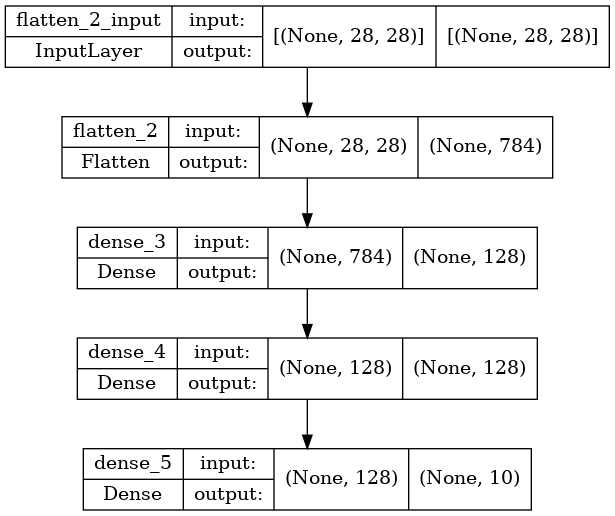

In [30]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [44]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


In [45]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/10


ValueError: in user code:

    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 919, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 1863, in sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/backend.py", line 5203, in sparse_categorical_crossentropy
        labels=target, logits=output)

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [ ]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

In [ ]:

from tensorflow_model_optimization.quantization.keras import vitis_quantize


In [ ]:
train_calib = np.random.rand(6000,28,28,1)


In [ ]:

quantizer = vitis_quantize.VitisQuantizer(model
                                         )
quantized_model = quantizer.quantize_model(calib_dataset = train_calib, weight_bit=8, activation_bit=8)

In [ ]:
quantized_model.compile(loss="sparse_categorical_crossentropy",metrics="accuracy")

score = quantized_model.evaluate(x_test, y_test,  verbose=0, batch_size=1)
print(score)


In [ ]:

quantized_model.save('Handwritten_digits_recog.h5')